# Bibliotecas

In [1]:
import sys

sys.path.append('/eos/user/t/thenriqu/Dark_Matter/LGBM_hhdm_analysis/')

import json
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
import hepherolib.analysis as ana

from lgbm.controllers_lgb_v2 import LGBLearner, LGBModel
from lgbm.utils import model_performance, compute_purity_cutflow, compute_best_thr
from hhdm_analysis.utils import position, signal_label

ana.start()
plt.style.use("default")

# Configuração

In [2]:
period = '16'
year_style = 2016
dataset_year = "2016"
basedir = '/eos/user/t/thenriqu/Dark_Matter/Amostras/hhdmAnalysis_deepJet_Regions/datasets'

# Setup figure folders
dataset_name = basedir.split('/')[-2]
figures_path = f"./figures/{dataset_name}/{dataset_year}/machine_learning"
Path(figures_path).mkdir(parents=True, exist_ok=True)

# Data folder
data_path = f"./data/{dataset_name}/{dataset_year}"
Path(data_path).mkdir(parents=True, exist_ok=True)

# Setup models folders
models_path = f"./models/{dataset_name}/{dataset_year}"
Path(models_path).mkdir(parents=True, exist_ok=True)

# Lendo Metadata

In [3]:
with open('/eos/user/t/thenriqu/Dark_Matter/metadata.json', 'r') as f:
    metadata = json.load(f)

# Lendo Dados e Modelo

In [4]:
model_name = 'LGB_multi_signal'
plot_label = 'Multi-signal'

# Train and Test data
X_train = pd.read_csv(f'{data_path}/{model_name}-train-data.csv')
X_test = pd.read_csv(f'{data_path}/{model_name}-test-data.csv')

W_train = X_train.pop('modelWeight').values
W_test = X_test.pop('modelWeight').values

Y_train = X_train.pop('Label').values
Y_test = X_test.pop('Label').values

evtWeight_train = X_train.pop('evtWeight').values
evtWeight_teste = X_test.pop('evtWeight').values

# Model
features = ["LeadingLep_pt", "LepLep_deltaM", "LepLep_deltaR", "LepLep_pt", "MET_LepLep_Mt", "MET_LepLep_deltaPhi", "MET_pt", "MT2LL", "Nbjets", "TrailingLep_pt"]
# model_path = f"{models_path}/{model_name}-clf.model"
# model = LGBModel(model_fpath=model_path)
model = LGBModel(model_fpath=f"{models_path}/{model_name}-clf.model")

# Predict do Treino e Teste

In [5]:
# Train
Y_pred_train = model.predict(X_train[features], features)
perf_train = model_performance(Y_train, Y_pred_train, n=1000)
ppv_train_cutflow = compute_purity_cutflow(perf_train.threshold, perf_train.fpr, perf_train.tpr, perf_train.ppv, perf_train.acc)
best_train_thr = compute_best_thr(perf_train.threshold, perf_train.tpr, perf_train.ppv)
ppv_train_cutflow.to_csv(f'{models_path}/{model_name}-ppv-train-cutflow.csv', index=False)


# Test
Y_pred_test = model.predict(X_test[features], features)
perf_test = model_performance(Y_test, Y_pred_test, n=1000)
ppv_test_cutflow = compute_purity_cutflow(perf_test.threshold, perf_test.fpr, perf_test.tpr, perf_test.ppv, perf_test.acc)
best_test_thr = compute_best_thr(perf_test.threshold, perf_test.tpr, perf_test.ppv)
ppv_test_cutflow.to_csv(f'{models_path}/{model_name}-ppv-test-cutflow.csv', index=False)

In [6]:
print('Best thr train:', best_train_thr)
display(ppv_train_cutflow)

Best thr train: 0.993993993993994


,purity_cut,purity,threshold,efficiency,bkg_rejection,accuracy
0,0.100000,0.100268,0.001001,1.000000,0.169924,0.240209
1,0.200000,0.200094,0.137137,0.997479,0.631126,0.662146
2,0.300000,0.300033,0.375375,0.985131,0.787397,0.804139
3,0.400000,0.400128,0.685686,0.955876,0.867435,0.874923
4,0.500000,0.500141,0.898899,0.911737,0.915707,0.915370
5,0.600000,0.602149,0.973974,0.848443,0.948143,0.939701
6,0.700000,0.712636,0.994995,0.738488,0.972453,0.952642
7,0.800000,0.822846,0.998999,0.475324,0.990533,0.946909
8,0.900000,0.099567,0.000000,1.000000,0.163424,0.234259
9,0.699643,0.699643,0.993994,0.753643,0.970071,0.951745


In [7]:
print('Best thr test', best_test_thr)
display(ppv_test_cutflow)

Best thr test 0.994994994994995


,purity_cut,purity,threshold,efficiency,bkg_rejection,accuracy
0,0.100000,0.100110,0.001001,0.998039,0.170052,0.240164
1,0.200000,0.200258,0.145145,0.980526,0.637748,0.666774
2,0.300000,0.300044,0.397397,0.960355,0.792743,0.806936
3,0.400000,0.400247,0.701702,0.936761,0.870143,0.875784
4,0.500000,0.500129,0.899900,0.903562,0.916454,0.915362
5,0.600000,0.601489,0.973974,0.843048,0.948328,0.939413
6,0.700000,0.713857,0.994995,0.735943,0.972710,0.952661
7,0.800000,0.822100,0.998999,0.472219,0.990547,0.946656
8,0.900000,0.099411,0.000000,0.998139,0.163486,0.234162
9,0.713857,0.713857,0.994995,0.735943,0.972710,0.952661


# Notificar quando terminar o teste

In [8]:
from IPython.display import clear_output, display, HTML, Javascript

display(Javascript("""
  var msg = new SpeechSynthesisUtterance();
  msg.text = "Process completed!";
  window.speechSynthesis.speak(msg);
  alert("Process completed!")
"""))

<IPython.core.display.Javascript object>

# Preparando dados para o Plot do Discriminate

In [9]:
scale_factor = 10**6

X_train['LGB_score'] = Y_pred_train
X_test['LGB_score'] = Y_pred_test

X_train['modelWeight'] = W_train/scale_factor
X_test['modelWeight'] = W_test/scale_factor

X_train['Label'] = Y_train
X_test['Label'] = Y_test

X_train["evtWeight"] = evtWeight_train
X_test['evtWeight'] = evtWeight_teste

# Plot do Discriminate usando modelWeigth

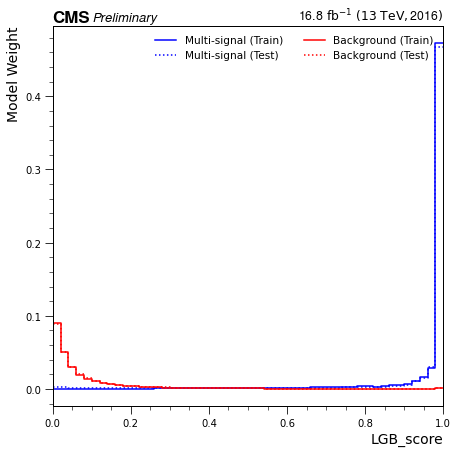

In [10]:
# Plot config
fig = plt.figure(figsize=(7,7))
grid = [1,1] # number of rows, number of cols
gspec = gs.GridSpec(grid[0], grid[1], width_ratios=[1], height_ratios=[1])

# Plot code
ax1 = plt.subplot(position(gspec, grid, main=1, sub=1)) # main is column number, sub is row number

ana.step_plot(ax1, "LGB_score", X_train[X_train.Label == 1], label=f"{plot_label} (Train)", color="blue", weight="modelWeight", bins=np.linspace(0, 1, 51))
ana.step_plot(ax1, "LGB_score", X_test[X_test.Label == 1], label=f"{plot_label} (Test)", color="blue", weight="modelWeight", bins=np.linspace(0, 1, 51), linestyle="dotted")
ana.step_plot(ax1, "LGB_score", X_train[X_train.Label == 0], label="Background (Train)", color="red", weight="modelWeight", bins=np.linspace(0, 1, 51))
ana.step_plot(ax1, "LGB_score", X_test[X_test.Label == 0], label="Background (Test)", color="red", weight="modelWeight", bins=np.linspace(0, 1, 51), linestyle="dotted")

ana.labels(ax1, ylabel="Model Weight", xlabel="LGB_score")
ana.style(
    ax1, lumi=metadata["luminosity"].get(dataset_year), year=year_style,
    ylog=False, legend_ncol=2, #ylim=[0, 1]
)
plt.savefig(f"{figures_path}/LGB_score-modelWeight-{model_name}.png", dpi=200, facecolor='white')
plt.show()

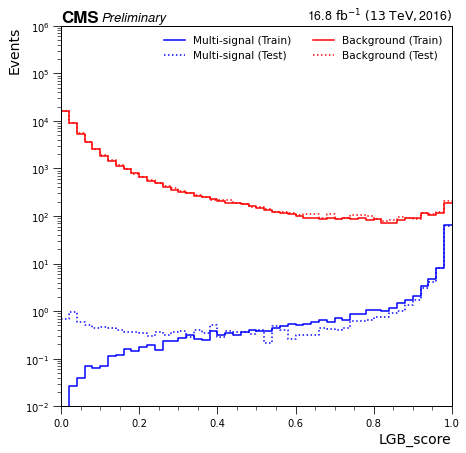

In [11]:
# Plot config
fig = plt.figure(figsize=(7,7))
grid = [1,1] # number of rows, number of cols
gspec = gs.GridSpec(grid[0], grid[1], width_ratios=[1], height_ratios=[1])

# Plot code
ax1 = plt.subplot(position(gspec, grid, main=1, sub=1)) # main is column number, sub is row number

ana.step_plot(ax1, "LGB_score", X_train[X_train.Label == 1], label=f"{plot_label} (Train)", color="blue", weight="evtWeight", bins=np.linspace(0, 1, 51))
ana.step_plot(ax1, "LGB_score", X_test[X_test.Label == 1], label=f"{plot_label} (Test)", color="blue", weight="evtWeight", bins=np.linspace(0, 1, 51), linestyle="dotted")
ana.step_plot(ax1, "LGB_score", X_train[X_train.Label == 0], label="Background (Train)", color="red", weight="evtWeight", bins=np.linspace(0, 1, 51))
ana.step_plot(ax1, "LGB_score", X_test[X_test.Label == 0], label="Background (Test)", color="red", weight="evtWeight", bins=np.linspace(0, 1, 51), linestyle="dotted")

ana.labels(ax1, ylabel="Events", xlabel="LGB_score")
ana.style(
    ax1, lumi=metadata["luminosity"].get(dataset_year), year=year_style,
    ylog=True, legend_ncol=2, ylim=[1e-2, 1e6]
)
plt.savefig(f"{figures_path}/LGB_score-evtWeight-{model_name}.png", dpi=200, facecolor='white')
plt.show()